## <center>Ratings Prediction Proect</center>

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating.

#### Problem statement:
<b>We have to build an application which can predict the rating by seeing the review</b>


#### Importing the required libraries:

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset:

In [33]:
df = pd.read_csv('final_data.csv')

df.head(10)

,Unnamed: 0,Ratings,Reviews
0,0,5,This laptop is very light weight thus you can ...
1,1,5,"Great for the price range, I was sceptical abo..."
2,2,5,"Good Product, I am satisfied all of the featur..."
3,3,5,Bought for 36k with SBI credit card discount.F...
4,4,5,I just bought this laptop after exchanging my ...
5,5,5,I was confused between asus and lenovo s145 la...
6,6,5,Good product in this price ...
7,7,5,I compare various leptop in i7 -11th gen with ...
8,8,5,After using one week I fell fell the laptop is...
9,9,4,Good laptop with best processor. It was delive...


In [34]:
# Dropping the column 'Unnamed: 0' since this is of no use

df = df.drop(['Unnamed: 0'], axis=1)

df.tail(10)

,Ratings,Reviews
8655,No Rating,It's awesome.... Just amazing🤩 Can't say anyth...
8656,4,Such a fantastic purchase ..Myntra deliever me...
8657,No Rating,Very nice products 👑 Good to purchase👛💸
8658,No Rating,When u want to get relief of the stress or any...
8659,4,The product is totally great and I recommend i...
8660,4,100% Best of best headset ever
8661,4,Its a nice product in 1400 Rs. Totally worth.I...
8662,4,Good product. But the sound bass quality littl...
8663,No Rating,Got it an hour back and using it from then. Qu...
8664,No Rating,"Well!!...if u like this then ""believe me"" it's..."


In [35]:
# Checking for the shape of the dataset

df.shape

(8665, 2)

- Our dataset contains 8665 rows and 2 columns.
- Ratings is the target column.


In [36]:
# Checking for the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8665 entries, 0 to 8664
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  8614 non-null   object
 1   Reviews  8526 non-null   object
dtypes: object(2)
memory usage: 135.5+ KB


- Since our dataset have some rows containing 'No Rating' & 'No Review'. So, we'll remove those rows since they will not help us to make the model.

In [37]:
#Replacing the 'No Rating' to null values

df['Ratings'].replace({'No Rating':np.nan}, inplace=True)

#Replacing the 'No Review' to null values
df['Reviews'].replace({'No Review':np.nan}, inplace=True)

In [38]:
df.tail(10)

,Ratings,Reviews
8655,NaN,It's awesome.... Just amazing🤩 Can't say anyth...
8656,4,Such a fantastic purchase ..Myntra deliever me...
8657,NaN,Very nice products 👑 Good to purchase👛💸
8658,NaN,When u want to get relief of the stress or any...
8659,4,The product is totally great and I recommend i...
8660,4,100% Best of best headset ever
8661,4,Its a nice product in 1400 Rs. Totally worth.I...
8662,4,Good product. But the sound bass quality littl...
8663,NaN,Got it an hour back and using it from then. Qu...
8664,NaN,"Well!!...if u like this then ""believe me"" it's..."


In [39]:
# Checking for the null values in the dataset
df.isnull().sum()

Ratings    3439
Reviews    1982
dtype: int64

- Our dataset contains null values.

In [40]:
# Removing the null values
df = df.dropna()

In [41]:
# Checking for the null values again

df.isnull().sum()

Ratings    0
Reviews    0
dtype: int64

In [42]:
#Checking for the shape of the dataset again
df.shape

(5148, 2)

In [43]:
# Checking for the info of the dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5148 entries, 0 to 8662
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ratings  5148 non-null   object
 1   Reviews  5148 non-null   object
dtypes: object(2)
memory usage: 120.7+ KB


In [44]:
# Changing the data type of column 'Ratings' to integer
df['Ratings'] = df['Ratings'].astype(float)
df['Ratings'] = df['Ratings'].astype(int)

In [45]:
# Checking for the value counts of the target column 'Ratings'

df['Ratings'].value_counts()

5    3156
4    1178
1     404
3     336
2      74
Name: Ratings, dtype: int64

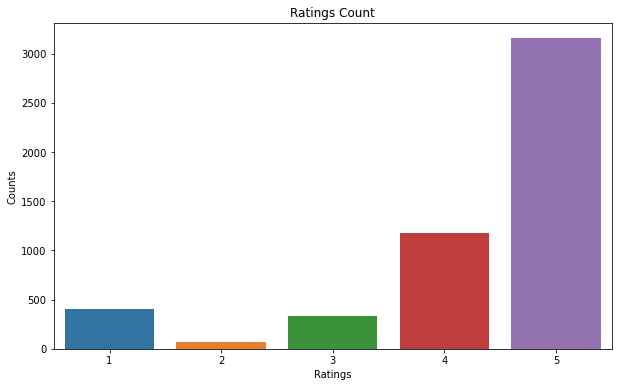

In [46]:
plt.figure(figsize=[10,6])
sns.countplot(df['Ratings'])
plt.title('Ratings Count')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.show()

In [47]:
# Checking for the length of the reviews and creating a new column for the same.

df['length']=df.Reviews.str.len()
df.head()

,Ratings,Reviews,length
0,5,This laptop is very light weight thus you can ...,507
1,5,"Great for the price range, I was sceptical abo...",508
2,5,"Good Product, I am satisfied all of the featur...",163
3,5,Bought for 36k with SBI credit card discount.F...,488
4,5,I just bought this laptop after exchanging my ...,503


In [48]:
# Converting all the reviews to lower case

df['Reviews']=df['Reviews'].str.lower()

df.head()

,Ratings,Reviews,length
0,5,this laptop is very light weight thus you can ...,507
1,5,"great for the price range, i was sceptical abo...",508
2,5,"good product, i am satisfied all of the featur...",163
3,5,bought for 36k with sbi credit card discount.f...,488
4,5,i just bought this laptop after exchanging my ...,503


In [49]:
#Replacing email address with 'email'

df['Reviews']=df['Reviews'].str.replace(r'^.+@[^\.].*\[a-z]{2,}$','emailaddress')

#Replacing URLs with 'webaddress'
df['Reviews']=df['Reviews'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')

#Replacing money symbol with 'moneysymb'(£ can type with ALT key+156)
df['Reviews']=df['Reviews'].str.replace(r'£|\$','dollers')

#Replacing 10 digit phone number(format include paranthesis, space, no spaces,dashes) with 'phone number'
df['Reviews']=df['Reviews'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

#Replacing whitespace between terms with a single space
df['Reviews']=df['Reviews'].str.replace(r'\s+',' ')

#Replacing number with 'numbr'
df['Reviews']=df['Reviews'].str.replace(r'^\d+(\.\d+)?','numbr')

#Removing punctuation
df['Reviews']=df['Reviews'].str.replace(r'[^\w\d\s]',' ')

#Removing leading and trailing whitespace
df['Reviews']=df['Reviews'].str.replace(r'^\s+|\s+?$',' ')

df.head()

,Ratings,Reviews,length
0,5,this laptop is very light weight thus you can ...,507
1,5,great for the price range i was sceptical abo...,508
2,5,good product i am satisfied all of the featur...,163
3,5,bought for 36k with sbi credit card discount f...,488
4,5,i just bought this laptop after exchanging my ...,503


In [50]:
# Removing the stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['Reviews']=df['Reviews'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [51]:
#Checking for the length of the reviews after removing the stopwords

df['clean_length']=df.Reviews.str.len()
df.head()

,Ratings,Reviews,length,clean_length
0,5,laptop light weight thus carry anywhere easily...,507,324
1,5,great price range sceptical amd build performa...,508,296
2,5,good product satisfied features except battery...,163,118
3,5,bought 36k sbi credit card discount first gami...,488,351
4,5,bought laptop exchanging 10 year old lenovo co...,503,333


#### Tokenization

In [52]:
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')

df['Reviews']=df['Reviews'].apply(lambda x:tokenizer.tokenize(x.lower()))

#### Stemming & Lemmatizing

In [53]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text=[lemmatizer.lemmatize(i) for i in text]
    return lem_text

df['Reviews']=df['Reviews'].apply(lambda x : word_lemmatizer(x))

In [54]:
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

def word_stemmer(text):
    stem_text=" ".join([stemmer.stem(i) for i in text])
    return stem_text

df['Reviews']=df['Reviews'].apply(lambda x : word_stemmer(x))

Text(0.5, 1.0, 'Reviews length distribution graph')

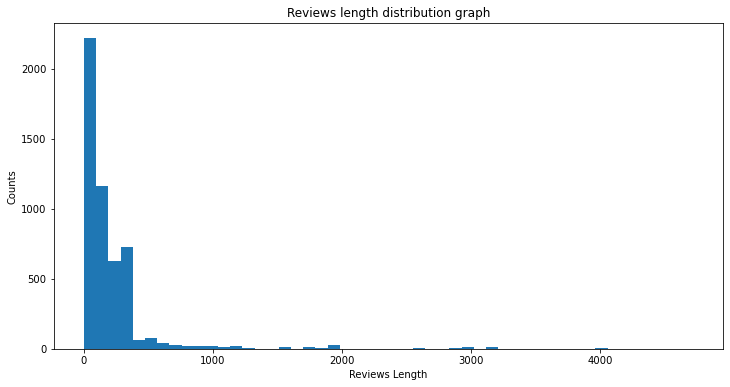

In [55]:
# Create and print a Reviews length distribution graph
review_length_distribution = pd.DataFrame(df["Reviews"].str.len())
review_length_distribution = review_length_distribution[review_length_distribution.Reviews < 5000]
review_length_distribution.groupby(["Reviews"])
review_length_distribution = review_length_distribution.plot(kind='hist', legend=None, bins=50, figsize=[12, 6])
review_length_distribution.set_xlabel("Reviews Length")
review_length_distribution.set_ylabel("Counts")
review_length_distribution.set_title("Reviews length distribution graph")

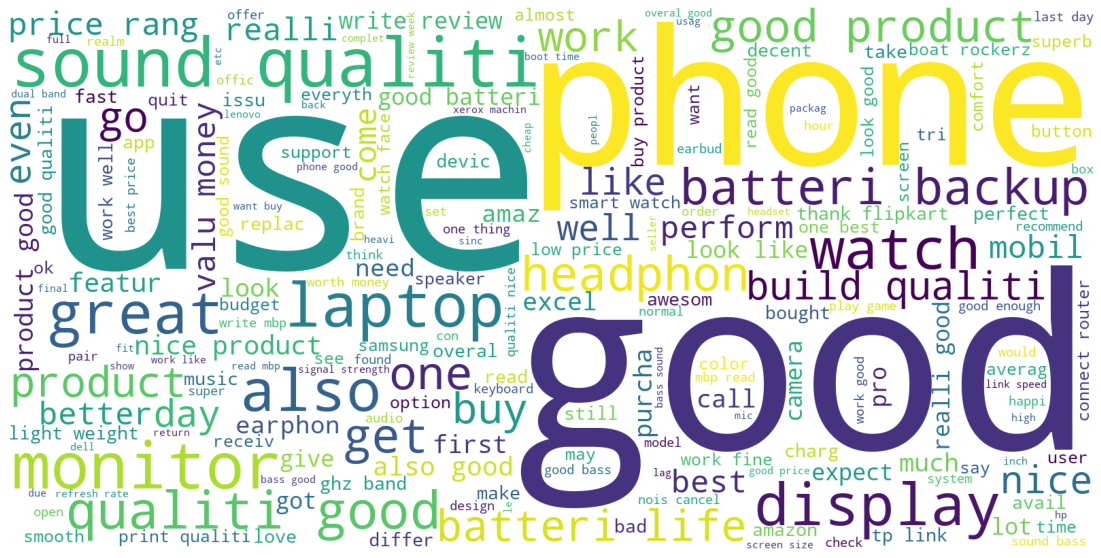

In [60]:
from wordcloud import WordCloud
# Create a long string of words.
word_string = ' '.join(df['Reviews'])

# Create word cloud
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=1600, height=800).generate(word_string)

plt.figure( figsize=(20,10), facecolor='white')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [61]:
#Converting text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(df['Reviews'])
x = features

In [62]:
y = df['Ratings']

In [63]:
# Creating train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,test_size=.25)

In [64]:
# Creating empty list

Model = []
score = []
cv_score = []

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

#### 1. Logistic Regression model:

In [66]:
LR=LogisticRegression()
Model.append('LogisticRegression')
LR.fit(x_train,y_train)
print(LR)
pre=LR.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(LR,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cv_score.append(sc*100)

LogisticRegression()


Accuracy_score=  0.7505827505827506
Cross_val_score= 0.6132452093181239 



#### 2. KNeighborsClassifier:

In [67]:
KNN=KNeighborsClassifier(n_neighbors=6)

Model.append('KNeighborsClassifier')
KNN.fit(x_train,y_train)
print(KNN)

pre=KNN.predict(x_test)
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)

score.append(AS*100)
sc=cross_val_score(KNN,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc)
cv_score.append(sc*100)

KNeighborsClassifier(n_neighbors=6)
Accuracy_score=  0.703962703962704
Cross_val_score= 0.5710896619396719


#### 3. DecisionTreeClassifier:

In [68]:
DT=DecisionTreeClassifier()
Model.append('DecisionTreeClassifier')
DT.fit(x_train,y_train)
print(DT)
pre=DT.predict(x_test)
print('\n')
AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(DT,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')
cv_score.append(sc*100)

DecisionTreeClassifier()


Accuracy_score=  0.745920745920746
Cross_val_score= 0.5351548774849746 



#### 4. RandomForestClassifier:

In [69]:
RF = RandomForestClassifier()
Model.append('RandomForestClassifier')
RF.fit(x_train,y_train)
print(RF)
pre=RF.predict(x_test)
print('\n')

AS=accuracy_score(y_test,pre)
print('Accuracy_score= ',AS)
score.append(AS*100)
sc=cross_val_score(RF,x,y,cv=5,scoring='accuracy').mean()
print('Cross_val_score=',sc,'\n')

cv_score.append(sc*100)

RandomForestClassifier()


Accuracy_score=  0.7762237762237763
Cross_val_score= 0.6416041590006321 



In [70]:
#Calculating the difference between accuracy score and cross validation score
difference = list(np.array(score) - np.array(cv_score))

# Creating dataframe
result = pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv_score,
                       'Difference':difference})
result

,Model,Accuracy_score,Cross_val_score,Difference
0,LogisticRegression,75.058275,61.324521,13.733754
1,KNeighborsClassifier,70.396270,57.108966,13.287304
2,DecisionTreeClassifier,74.592075,53.515488,21.076587
3,RandomForestClassifier,77.622378,64.160416,13.461962


- From the above table, we found that the minimum difference between the accuracy score and cross validation score is for KNeighborsClassifier. <b>So, the best fit model for our project is KNeighborsClassifier.</b>

#### Hyperparameter tuning:

In [71]:
leaf_size = list(range(1,20))
n_neighbors = list(range(1,10))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn_2 = KNeighborsClassifier()

#Using GridSearch
gsc = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fitting the model
best_model = gsc.fit(x_train,y_train)

#Printing the values of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [73]:
final_model = KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)
final_model.fit(x_train, y_train)
pred = final_model.predict(x_test)

print(accuracy_score(y_test,pred)*100)
print(classification_report(y_test,pred))

75.13597513597513
              precision    recall  f1-score   support

           1       0.97      0.62      0.75       112
           2       1.00      0.47      0.64        15
           3       0.54      0.28      0.37        79
           4       0.81      0.41      0.54       297
           5       0.73      0.95      0.83       784

    accuracy                           0.75      1287
   macro avg       0.81      0.54      0.63      1287
weighted avg       0.76      0.75      0.73      1287



- After <b>Hyper parameter tuning</b>, we got <b>75% accuracy score</b>.

In [75]:
# Saving the final model
import joblib
filename = 'ratings_prediction_project.pkl'
joblib.dump(final_model, open(filename, 'wb'))

#### Checking for the performance of our model:

In [77]:
x = 'Really very good product. Thank you for the fast delivery.'
test = tf_vec.transform([x])
final_model.predict(test)

array([5])

In [88]:
y = 'waste of money. very bad product.'
test2 = tf_vec.transform([y])
final_model.predict(test2)

array([3])